In [1]:
import gpytorch
import numpy as np
import pandas as pd
import torch
from datetime import datetime
from matplotlib import pyplot as plt


import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

from bo_functions_generic import gen_theta_set

from CS2_bo_plotters import plot_obj_abs_min
from CS2_bo_plotters import value_plotter
from CS2_bo_plotters import plot_obj
from CS2_bo_plotters import plot_Theta
from CS2_bo_plotters import plot_Theta_min
from CS2_bo_plotters import path_name
from CS2_bo_functions_multi_dim import set_ep
from CS2_bo_plotters import plot_org_train, save_fig

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# DateTime = "2022/10/21/13-05" #Date and Time - Dispayed in job file
DateTime = "2022/10/21/13-18" #Date and Time - Dispayed in job file
# DateTime = None

exp_d = 1
n = 5

param_dict = {0 : '\\theta_1', 1 : '\\theta_2'}
indecies = [list(param_dict.keys())[list(param_dict.values()).index('\\theta_1')],
            list(param_dict.keys())[list(param_dict.values()).index('\\theta_2')]]

Theta_True = np.array([1,-1])

bounds = np.array([[-2, -2],
                   [ 2,  2]])


# exp_d = 2
# n = 15 #Number of experimental data points to use

# param_dict = {0 : 'a_1', 1 : 'a_2', 2 : 'a_3', 3 : 'a_4',
#               4 : 'b_1', 5 : 'b_2', 6 : 'b_3', 7 : 'b_4'}
# indecies = [list(param_dict.keys())[list(param_dict.values()).index('a_1')],
#             list(param_dict.keys())[list(param_dict.values()).index('a_2')]]

# Constants = np.array([[-200,-100,-170,15],
#                       [-1,-1,-6.5,0.7],
#                       [0,0,11,0.6],
#                       [-10,-10,-6.5,0.7],
#                       [1,0,-0.5,-1],
#                       [0,0.5,1.5,1]])

# Theta_True = Constants[1:3].flatten()

# bounds = np.array([[-2, -2, -10, -2, -2, -2,  5, -2],
#                    [ 2,  2,   0,  2,  2,  2, 15,  2]])

param_names_list = [param_dict[0], param_dict[1]] #Fill in depending on problem
mesh_combo = str(param_names_list[0]) + "-" + str(param_names_list[1])

set_lengthscale = None
save_CSV = False

#Define GP Testing space
p=20
d = len(Theta_True)

# Need to redefine to save theta_set_org 
# theta_set_org = gen_theta_set(LHS = True, n_points = p, dimensions = d, bounds = bounds)
# Theta1_lin = np.linspace(np.min(theta_set_org[:,indecies[0]]),np.max(theta_set_org[:,indecies[0]]), p)
# Theta2_lin = np.linspace(np.min(theta_set_org[:,indecies[1]]),np.max(theta_set_org[:,indecies[1]]), p)
# theta_mesh = np.array(np.meshgrid(Theta1_lin, Theta2_lin)) 

theta_mesh = gen_theta_set(LHS = False, n_points = p, dimensions = d, bounds = bounds)
theta_mesh = theta_mesh.T.reshape((2, p, p))
# print(theta_mesh.shape)

# tot_iter = bo_iters= 3 #Total Number of iters - Dispayed in job file
# tot_runs = 2 #Total Number of runs - Dispayed in job file

tot_iter = bo_iters= 100 #Total Number of iters - Dispayed in job file
tot_runs = 15 #Total Number of runs - Dispayed in job file

is_figure = True
save_figure = False

In [3]:
#Define Factors for BO images and paths for all 4 images (ln(SSE) Heat Maps)
fxn = "value_plotter"
# title_save = "EI"
# title = 'E(I(\\theta))'
# title = 'log(E(I(\\theta)))'
title_save = "ln(SSE)"
title = 'log(e(\\theta))'

emulator =    [False,   True,     True]
obj =         ["LN_obj","LN_obj", "obj" ]
sparse_grid = [False,   False,    True]
sep_fact =    [1.0,     0.2,      0.7]

t0 = 20
t = []
ep = []
for i in range(len(sep_fact)):
    ep.append(set_ep(emulator[i], obj[i], sparse_grid[i]))
    if emulator[i] == True:
        t_new = n*t0
    else:
        t_new = t0
    t.append(t_new)

run = np.array([8,11,12])
Bo_iter = np.array([100,6, 6])

run -= 1 # run should be number you want -1
Bo_iter -= 1 #Iter you want -1


path_list = ["CS1/Figures/NLR_ln(SSE).png"]
for i in range(len(sep_fact)):
    path_title = path_name(emulator[i], ep[i], sparse_grid[i], fxn, set_lengthscale, t[i], obj[i], None, Bo_iter[i], 
                           title_save, run[i], tot_iter=tot_iter, tot_runs=tot_runs, DateTime=DateTime, 
                           sep_fact = sep_fact[i], is_figure = is_figure)
    path_list.append(path_title + ".png")


In [15]:
#Define Factors for BO images and paths for all 4 images (EI Heat Maps)
fxn = "value_plotter"
title_save = "EI"
title = 'E(I(\\theta))'
# title = 'log(E(I(\\theta)))'
# title_save = "ln(SSE)"
# title = 'log(e(\\theta))'

emulator =    [False, False,   True,     True]
obj =         ["obj", "LN_obj","LN_obj", "obj" ]
sparse_grid = [False, False,  False,    True]
sep_fact =    [0.1,   1.0,     0.2,      0.7]
mesh_combo_list = [mesh_combo, None, None, mesh_combo]
t0 = 20
t = []
ep = []
for i in range(len(sep_fact)):
    ep.append(set_ep(emulator[i], obj[i], sparse_grid[i]))
    if emulator[i] == True:
        t_new = n*t0
    else:
        t_new = t0
    t.append(t_new)

run = np.array([3,8,11,12])
Bo_iter = np.array([45,100,6, 6])

run -= 1 # run should be number you want -1
Bo_iter -= 1 #Iter you want -1


path_list = []
for i in range(len(sep_fact)):
    path_title = path_name(emulator[i], ep[i], sparse_grid[i], fxn, set_lengthscale, t[i], obj[i], mesh_combo_list[i], 
                           Bo_iter[i], title_save, run[i], tot_iter=tot_iter, tot_runs=tot_runs, DateTime=DateTime, 
                           sep_fact = sep_fact[i], is_figure = is_figure)
    path_list.append(path_title + ".png")
# print(path_list)


In [5]:
#Define Factors for BO images and paths for all 4 images (Min(Obj) Heat Maps)
fxn = "plot_obj_abs_min"
title_save = "Obj_Min_Sep_Fact_1.0"

emulator =    [False, False,   True,     True]
obj =         ["obj", "LN_obj","LN_obj", "obj" ]
sparse_grid = [False, False,  False,    True]
sep_fact =    [1.0,   1.0,     1.0,      1.0]

t0 = 20
t = []
ep = []
for i in range(len(sep_fact)):
    ep.append(set_ep(emulator[i], obj[i], sparse_grid[i]))
    if emulator[i] == True:
        t_new = n*t0
    else:
        t_new = t0
    t.append(t_new)

run = np.array([3,8,11,12])
Bo_iter = np.array([45,100,6, 6])

run -= 1 # run should be number you want -1
Bo_iter -= 1 #Iter you want -1


path_list = []
for i in range(len(sep_fact)):
    path_title = path_name(emulator[i], ep[i], sparse_grid[i], fxn, set_lengthscale, t[i], obj[i], mesh_combo = None, 
                           bo_iter= None, title_save = None, run = None, tot_iter=tot_iter, tot_runs=tot_runs, 
                           DateTime = DateTime, sep_fact = sep_fact[i], is_figure = is_figure)
    path_list.append(path_title + ".png")


In [7]:
#Define Factors for BO images and paths for all 4 images (Min(Obj) Heat Maps)
fxn = "plot_EI_abs_max"
title_save = "EI_Max_Sep_Fact_1.0"

emulator =    [False, False,   True,     True]
obj =         ["obj", "LN_obj","LN_obj", "obj" ]
sparse_grid = [False, False,  False,    True]
sep_fact =    [1.0,   1.0,     1.0,      1.0]

t0 = 20
t = []
ep = []
for i in range(len(sep_fact)):
    ep.append(set_ep(emulator[i], obj[i], sparse_grid[i]))
    if emulator[i] == True:
        t_new = n*t0
    else:
        t_new = t0
    t.append(t_new)

run = np.array([3,8,11,12])
Bo_iter = np.array([45,100,6, 6])

run -= 1 # run should be number you want -1
Bo_iter -= 1 #Iter you want -1


path_list = []
for i in range(len(sep_fact)):
    path_title = path_name(emulator[i], ep[i], sparse_grid[i], fxn, set_lengthscale, t[i], obj[i], mesh_combo = None, 
                           bo_iter= None, title_save = None, run = None, tot_iter=tot_iter, tot_runs=tot_runs, 
                           DateTime = DateTime, sep_fact = sep_fact[i], is_figure = is_figure)
    print(path_title)
    path_list.append(path_title + ".png")

2022/10/21/13-18/Figures/Convergence_Figs/GP_Error_Emulator/TP_20/obj/ep_0.3/len_scl_varies/Sep_Fact_1.0/Total_Runs_15/Max_EI_Conv
2022/10/21/13-18/Figures/Convergence_Figs/GP_Error_Emulator/TP_20/LN_obj/ep_0.5/len_scl_varies/Sep_Fact_1.0/Total_Runs_15/Max_EI_Conv
2022/10/21/13-18/Figures/Convergence_Figs/GP_Emulator/Approx/TP_100/LN_obj/ep_1.0/len_scl_varies/Sep_Fact_1.0/Total_Runs_15/Max_EI_Conv
2022/10/21/13-18/Figures/Convergence_Figs/GP_Emulator/Sparse/TP_100/obj/ep_1.0/len_scl_varies/Sep_Fact_1.0/Total_Runs_15/Max_EI_Conv


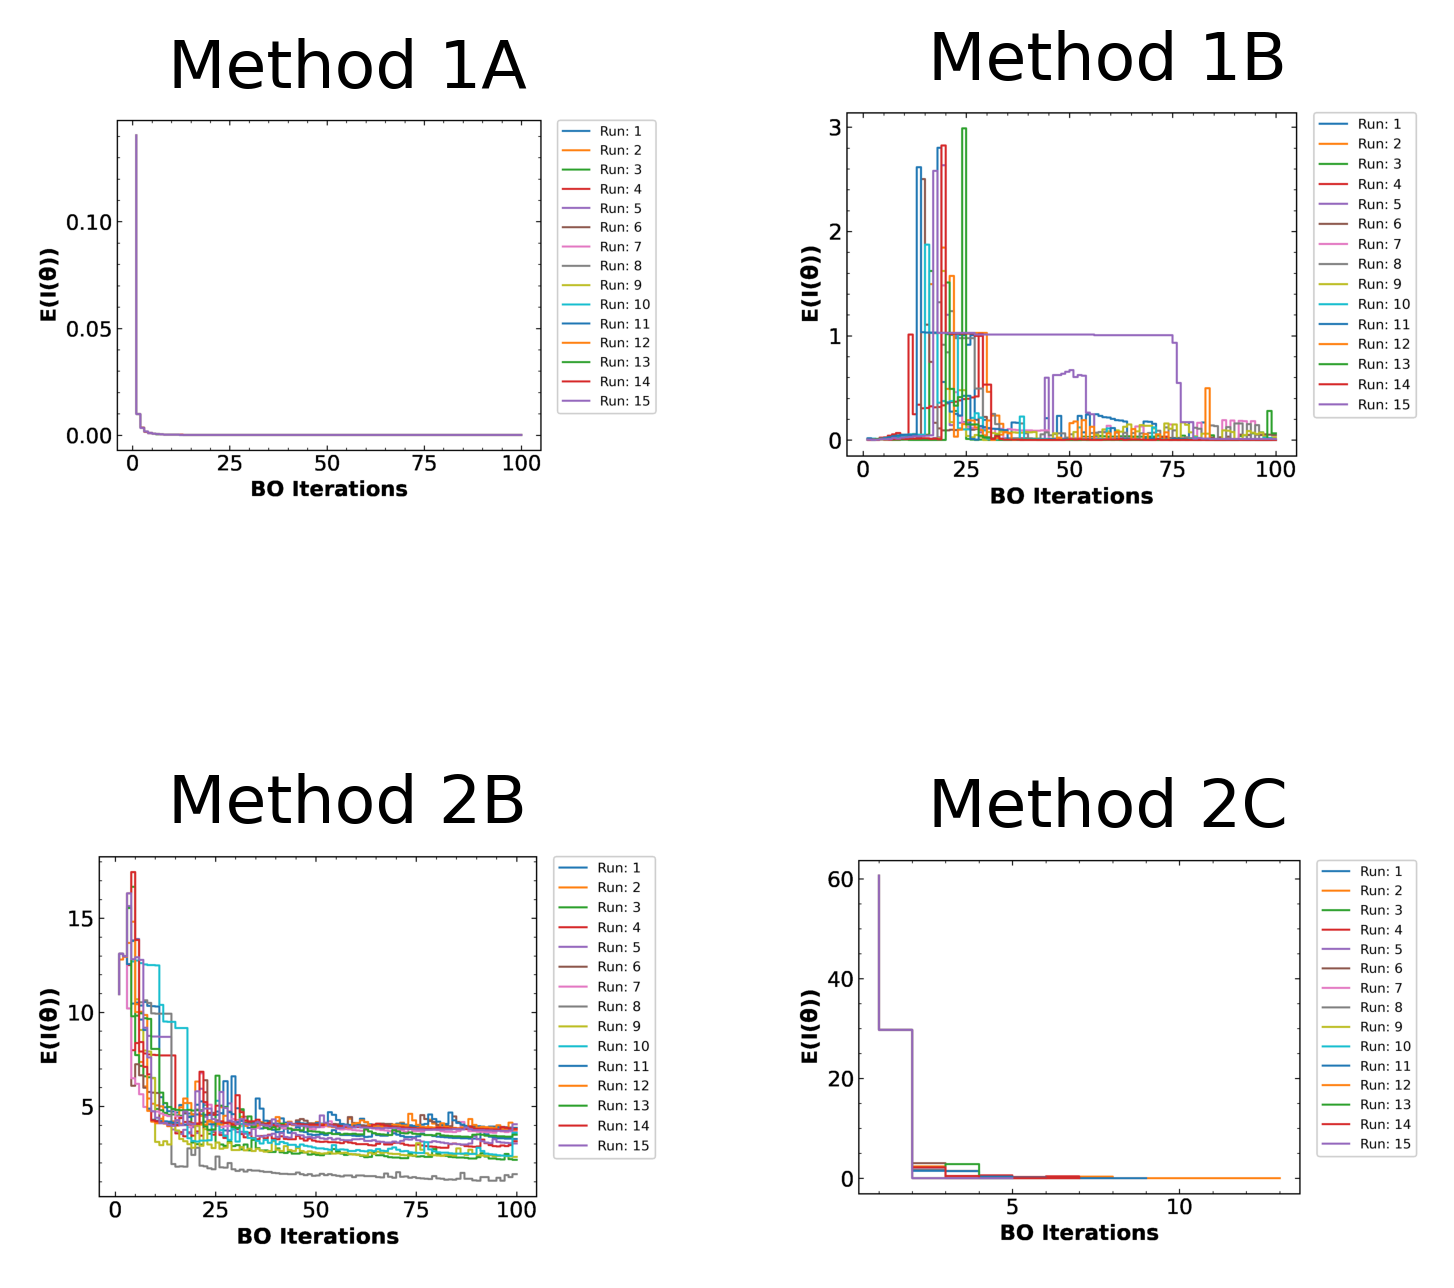

In [8]:
# code for displaying multiple images in one figure
save_figure = True
#import libraries
import cv2
from matplotlib import pyplot as plt

Img_names = ["Method 1A", "Method 1B", "Method 2B", "Method 2C"]
# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Images = []
for i in range(len(path_list)):
    Img = cv2.imread(path_list[i])
    Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
    Images.append(Img)

# create figure
fig = plt.figure(figsize=(6, 6))

for i in range(len(Images)):
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, i+1)

    # showing image
    plt.imshow(Images[i])
    plt.axis('off')
    plt.title(Img_names[i], fontsize = 16)

if save_figure == True:
    save_to_path = "4_fig_plots/CS1/"+str(title_save)+"_maps"
    save_fig(save_to_path, ext='png', close=False, verbose=False)
